In [21]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

#for plotting queries
%matplotlib inline
from matplotlib import style
#style.use('bmh')
import matplotlib.pyplot as plt


In [22]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)



In [23]:
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [26]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [27]:
#  3. Convert the June temperatures to a list.
june_temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [28]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp)
print(june_temp_df)

         0
0     78.0
1     76.0
2     78.0
3     76.0
4     77.0
...    ...
1695  79.0
1696  74.0
1697  74.0
1698  76.0
1699  75.0

[1700 rows x 1 columns]


In [29]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,0
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


(0.0, 400.0)

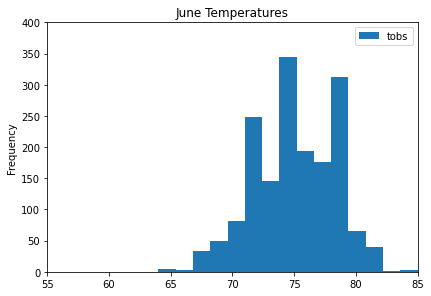

In [30]:
#create a graph for high-level  temp summary
june_temp_df = pd.DataFrame(june_temp, columns=['tobs'])
june_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([55, 85])
plt.ylim([0,400])

## D2: Determine the Summary Statistics for December

In [31]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_date_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [32]:
# 7. Convert the December temperatures to a list.
dec_temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [33]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp)
print(dec_temp_df)

         0
0     76.0
1     74.0
2     74.0
3     64.0
4     64.0
...    ...
1512  71.0
1513  71.0
1514  69.0
1515  65.0
1516  65.0

[1517 rows x 1 columns]


In [34]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,0
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


(0.0, 400.0)

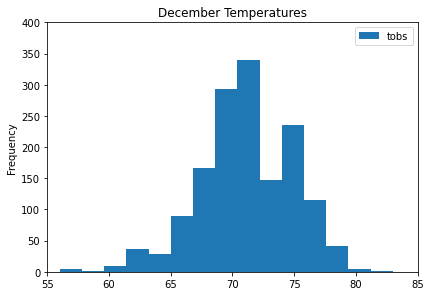

In [35]:
#created a graph for high level summary 
dec_temp_df = pd.DataFrame(dec_temp, columns=['tobs'])
dec_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([55,85])
plt.ylim([0,400])

In [36]:
################################
#additional queries - amount of precipitation per month

In [48]:
#June precipitation
# Use Pandas Plotting with) Matplotlib to plot the data
june_prcp = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
june_prcp_df = pd.DataFrame(june_prcp)
june_prcp_df.describe()

,0
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


(0.0, 50.0)

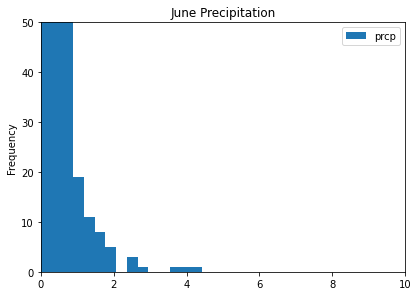

In [50]:
#created a graph for high level summary 
june_prcp_df = pd.DataFrame(june_prcp, columns=['prcp'])
june_prcp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Precipitation')
plt.xlim([0,10])
plt.ylim([0,50])

In [47]:
#december precipitation
dec_prcp = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec_prcp_df = pd.DataFrame(dec_prcp)
dec_prcp_df.describe()

,0
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


(0.0, 50.0)

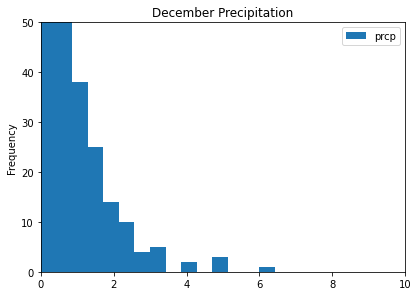

In [51]:
#created a graph for high level summary 
dec_prcp_df = pd.DataFrame(dec_prcp, columns=['prcp'])
dec_prcp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Precipitation')
plt.xlim([0,10])
plt.ylim([0,50])

In [ ]:
##second query - temps for each quarter March, September

In [52]:
#March
March_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 3).all()
March_temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 3).all()
March_temp_df = pd.DataFrame(March_temp)
print(March_temp_df)

         0
0     70.0
1     72.0
2     73.0
3     70.0
4     71.0
...    ...
1688  72.0
1689  74.0
1690  69.0
1691  69.0
1692  76.0

[1693 rows x 1 columns]


In [53]:
March_temp_df.describe()

,0
count,1693.000000
mean,70.059067
std,3.845271
min,56.000000
25%,68.000000
50%,70.000000
75%,73.000000
max,82.000000


In [54]:
#september
Sept_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 9).all()
Sept_temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 9).all()
Sept_temp_df = pd.DataFrame(Sept_temp)
print(Sept_temp_df)

         0
0     77.0
1     76.0
2     78.0
3     77.0
4     77.0
...    ...
1475  74.0
1476  74.0
1477  77.0
1478  77.0
1479  73.0

[1480 rows x 1 columns]


In [55]:
Sept_temp_df.describe()

,0
count,1480.000000
mean,76.164865
std,3.535178
min,64.000000
25%,74.000000
50%,76.000000
75%,79.000000
max,87.000000
